# Advanced Machine Learning 

## Forcasting model
- SARIMA Forecasting

This study proposes the implementation of a time-series analysis algorithm to develop a forecasting model for predicting the total revenue of sales across all stores and items for the next seven days.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
import math
import datetime
import statsmodels.api as sm

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import itertools
from itertools import cycle

In [1]:
import sys
sys.path.append('/Users/cent/Documents/MDSI_Spring2023/avml_at2/adv_mla_at2/src')

In [3]:
df = pd.read_csv('/Users/cent/Documents/MDSI_Spring2023/avml_at2/adv_mla_at2/data/processed/cleaned_data_selected_cols.csv')

In [4]:
df_copy = df.copy()

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47107050 entries, 0 to 47107049
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   value             float64
 2   sell_price        float64
 3   month             int64  
 4   year              int64  
 5   day               int64  
 6   has_event         int64  
 7   revenue_lag1      float64
 8   revenue_lag7      float64
 9   revenue_lag30     float64
 10  item_id_encoded   int64  
 11  dept_id_encoded   int64  
 12  cat_id_encoded    int64  
 13  store_id_encoded  int64  
 14  state_id_encoded  int64  
 15  revenue           float64
dtypes: float64(6), int64(9), object(1)
memory usage: 5.6+ GB


In [6]:
df_copy.isnull().sum()

date                       0
value                      0
sell_price          12291876
month                      0
year                       0
day                        0
has_event                  0
revenue_lag1        12291877
revenue_lag7        12291883
revenue_lag30       12291906
item_id_encoded            0
dept_id_encoded            0
cat_id_encoded             0
store_id_encoded           0
state_id_encoded           0
revenue             12291876
dtype: int64

In [7]:
df_copy.shape

(47107050, 16)

In [5]:
df_copy.dropna(inplace=True)

In [18]:
df_copy.columns

Index(['date', 'value', 'sell_price', 'month', 'year', 'day', 'has_event',
       'revenue_lag1', 'revenue_lag7', 'revenue_lag30', 'item_id_encoded',
       'dept_id_encoded', 'cat_id_encoded', 'store_id_encoded',
       'state_id_encoded', 'revenue'],
      dtype='object')

In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22473076 entries, 107 to 47107049
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   value             float64
 2   sell_price        float64
 3   month             int64  
 4   year              int64  
 5   day               int64  
 6   has_event         int64  
 7   revenue_lag1      float64
 8   revenue_lag7      float64
 9   revenue_lag30     float64
 10  item_id_encoded   int64  
 11  dept_id_encoded   int64  
 12  cat_id_encoded    int64  
 13  store_id_encoded  int64  
 14  state_id_encoded  int64  
 15  revenue           float64
dtypes: float64(6), int64(9), object(1)
memory usage: 2.8+ GB


**Time Series Plot**

Plot your data over time. Look for patterns or recurring trends.
Check if there are regular intervals or cycles in the data.

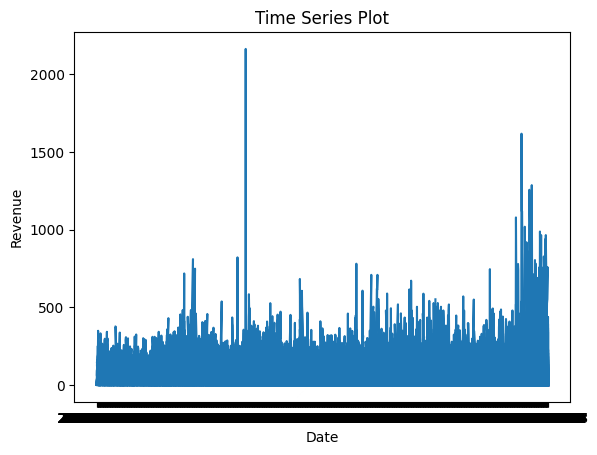

In [31]:
import matplotlib.pyplot as plt

# Increase agg.path.chunksize
plt.rcParams['agg.path.chunksize'] = 200 

plt.plot(df['date'], df['revenue'])
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Time Series Plot')
plt.show()

In [ ]:
# Set 'date' as the index and create a new DataFrame
df_ts = df.set_index('date')

# Resample the data to quarterly frequency
df_quarterly = df_ts.resample('Q').sum()

# Increase agg.path.chunksize
plt.rcParams['agg.path.chunksize'] = 200

# Plot the quarterly data
plt.plot(df_quarterly.index, df_quarterly['revenue'])
plt.xlabel('Date (Quarterly)')
plt.ylabel('Revenue')
plt.title('Time Series Plot (Quarterly)')
plt.show()

**Seasonal Decomposition**

Use seasonal decomposition to break down your time series into trend, seasonal, and residual components.

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

def time_series_decompose(df, model_specified, period):

    '''
    returns decomposed time series components (with seasonality, trend and residuals) of time_series df
    
    inputs: df (time series df), model_specified (whether additive or multiplicative), period (number of days)
    returns: trend values, seasonality values and residual values of time_series df
    
    '''
    df.set_index(['date', 'store_id_encoded', 'item_id_encoded'], inplace=True)
    
    # Extract the target column for decomposition
    target_column = 'revenue'  # Replace with your actual target column name
    time_series = df[target_column]
    
    df_decomposition = seasonal_decompose(
        x=time_series, 
        model=model_specified, 
        period=period
    )
    
    est_trend = df_decomposition.trend
    est_seasonal = df_decomposition.seasonal
    est_residual = df_decomposition.resid
    
    return est_trend, est_seasonal, est_residual

sample_time_s1 = df_copy[3000:3500].copy()  # Make a copy to avoid modifying the original DataFrame
est_trend, est_seasonal, est_residual = time_series_decompose(sample_time_s1, 'additive', 30)

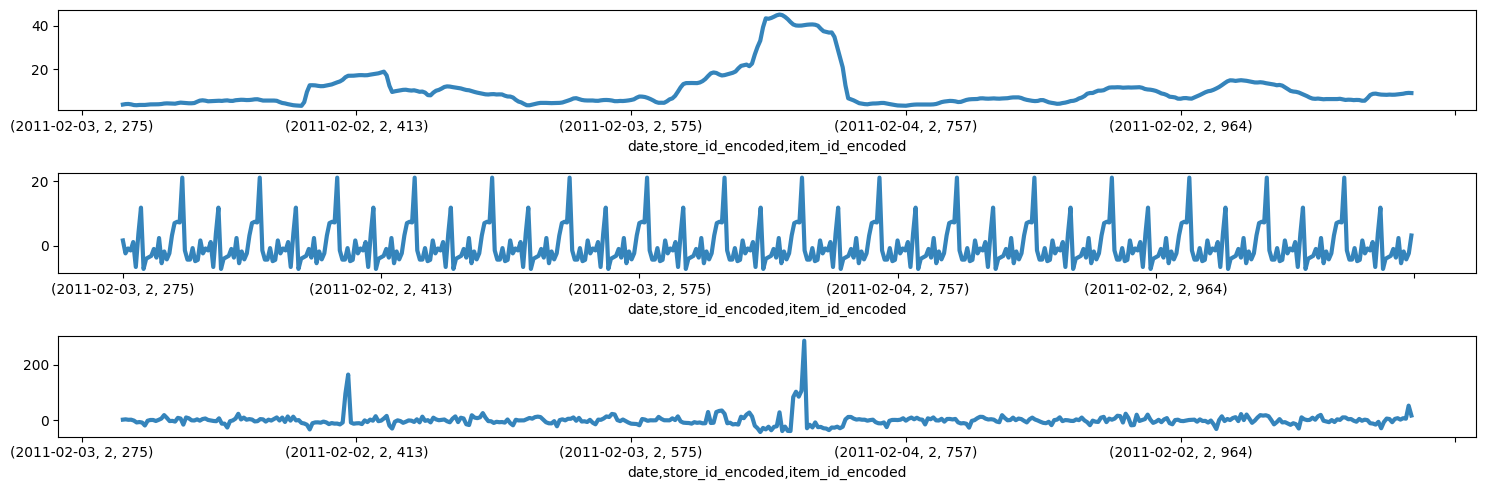

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 7))

est_trend.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax1)
est_seasonal.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax2)
est_residual.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax3)

fig.tight_layout()
plt.show()

**Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)**

Plot the ACF and PACF to identify autocorrelation patterns, which can indicate seasonality.

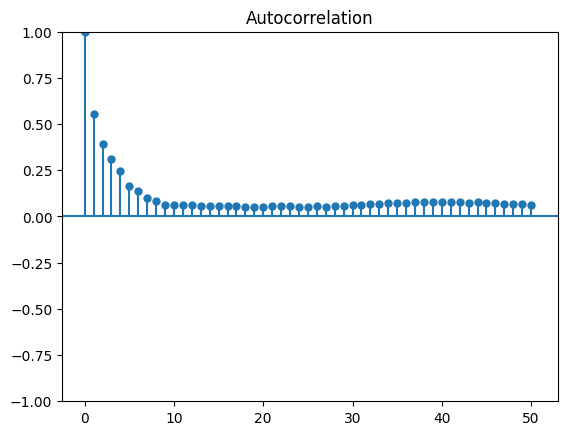

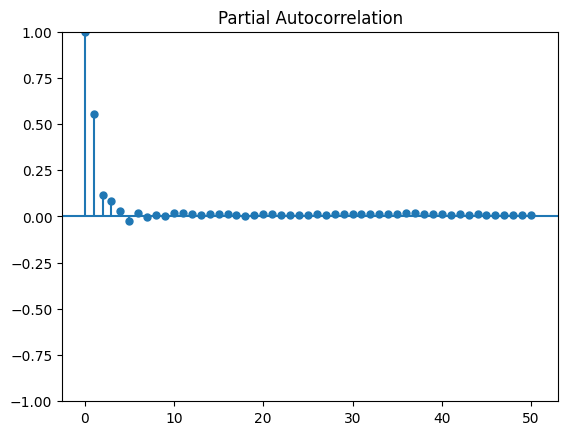

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sample_ts2 = df_copy[1:1000000].copy()

plot_acf(sample_ts2['revenue'], lags=50)
plt.show()

plot_pacf(sample_ts2['revenue'], lags=50)
plt.show()

**Statistical Tests**

Use statistical tests to check for seasonality. One common test is the Augmented Dickey-Fuller (ADF) test for unit roots.

In [4]:
from statsmodels.tsa.stattools import adfuller

sample_ts3 = df_cleaned[1:500000].copy()

# Applying the ADF test to the 'revenue' column
result = adfuller(sample_ts3['revenue'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -45.40244159318477
p-value: 0.0


In [8]:
from statsmodels.tsa.stattools import adfuller

sample_ts3 = df_cleaned[1:500000].copy()

# Difference the 'revenue' column
# sample_ts3['diff_revenue'] = sample_ts3['revenue'].diff()

# Drop the first NaN value created by differencing
# sample_ts3 = sample_ts3.dropna()

# Apply the ADF test to the differenced time series
result = adfuller(sample_ts3['diff_revenue'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -115.59012712669599
p-value: 0.0


# Forecasting

In [6]:
df_cleaned = df_copy.copy()
# Difference the 'revenue' column
df_cleaned['diff_revenue'] = df_cleaned['revenue'].diff()
# Drop the first NaN value created by differencing
df_cleaned = df_cleaned.dropna()


In [4]:
# Save the new DataFrame to a CSV file
# df_cleaned.to_csv('/Users/cent/Documents/MDSI_Spring2023/avml_at2/adv_mla_at2/data/processed/df_cleaned_diff.csv', index=False)

In [2]:
df_cleaned = pd.read_csv('/Users/cent/Documents/MDSI_Spring2023/avml_at2/adv_mla_at2/data/processed/df_cleaned_diff.csv')

In [22]:
df_cleaned.head(5)

,date,value,sell_price,month,year,day,has_event,revenue_lag1,revenue_lag7,revenue_lag30,item_id_encoded,dept_id_encoded,cat_id_encoded,store_id_encoded,state_id_encoded,revenue,diff_revenue
0,2011-02-01,0.0,0.70,2,2011,1,0,2.10,3.5,11.96,1452,3,1,0,0,0.00,-2.10
1,2011-02-02,15.0,0.70,2,2011,2,0,0.00,0.0,0.00,1452,3,1,0,0,10.50,10.50
2,2011-02-03,32.0,0.70,2,2011,3,0,10.50,0.0,0.00,1452,3,1,0,0,22.40,11.90
3,2011-02-04,1.0,0.70,2,2011,4,0,22.40,0.0,0.00,1452,3,1,0,0,0.70,-21.70
4,2011-01-29,1.0,6.84,1,2011,29,0,2.35,0.0,5.22,1503,3,1,0,0,6.84,6.14


In [3]:
# Assuming 'date' is a datetime column and 'diff_revenue' is the target variable
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned.set_index('date', inplace=True)

# Resample to daily frequency and sum the revenue for each day
daily_revenue = df_cleaned.resample('D').sum()

In [ ]:
# Split based on the year
# train = daily_revenue[daily_revenue.index.year < 2015]
# test = daily_revenue[daily_revenue.index.year >= 2015]

In [25]:
# Calculate the index to split the data
# train_size = int(len(daily_revenue) * 0.8)

# Split the data into training and test sets using iloc
# train, test = daily_revenue.iloc[:train_size], daily_revenue.iloc[train_size:]

In [26]:
# Display the lengths of train and test sets
# print("Training set length:", len(train))
# print("Testing set length:", len(test))

Training set length: 1232
Testing set length: 309


In [81]:
# train.head()

## Diff_revenue

In [9]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the parameter grids
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)
s_values = [7]  # Assuming a weekly seasonality

# Create a list of all possible parameter combinations
param_grid = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

# Perform grid search
best_rmse_score = float('inf')
best_mae_score = float('inf')
best_params = None

for params in param_grid:
    try:
        model = SARIMAX(train['diff_revenue'], order=params[:3], seasonal_order=params[3:])
        result = model.fit(disp=False)
        forecast = result.get_forecast(steps=len(test))
        
        mse = mean_squared_error(test['diff_revenue'], forecast.predicted_mean)
        rmse = np.sqrt(mse)  # Calculate RMSE
        
        mae = mean_absolute_error(test['diff_revenue'], forecast.predicted_mean)  # Calculate MAE
        
        if rmse < best_rmse_score:
            best_rmse_score = rmse
            best_params = params
        
        if mae < best_mae_score:
            best_mae_score = mae
    except:
        continue

print('Best Parameters:', best_params)
print('Best RMSE:', best_rmse_score)
print('Best MAE:', best_mae_score)


/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/cent/.pyenv/v

Best Parameters: (0, 1, 1, 1, 1, 2, 7)
Best RMSE: 10133.500059470869
Best MAE: 8131.3725307848545


In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
order = (0, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 2, 7)  # (P, D, Q, s)
model = SARIMAX(daily_revenue['diff_revenue'], order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

# Forecast the next 7 days
forecast_steps = 7
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=daily_revenue.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='D')

# Combine actual data and forecast
combined = pd.concat([daily_revenue, forecast.predicted_mean.to_frame(name='forecast')], axis=1)


/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [36]:
# Extract the actual values from the test set
actual_values_diff = daily_revenue.tail(7)['diff_revenue']

# Extract the forecasted values
forecast_values_diff = forecast.predicted_mean

# Print or display the actual and forecasted values
print("Actual Values:")
print(actual_values_diff)

print("\nForecasted Values:")
print(forecast_values_diff)

Actual Values:
date
2015-04-12    10298.97
2015-04-13   -42130.68
2015-04-14    -5187.52
2015-04-15     3893.57
2015-04-16    -8330.32
2015-04-17     4547.21
2015-04-18        3.00
Freq: D, Name: diff_revenue, dtype: float64

Forecasted Values:
2015-04-19     2624.091967
2015-04-20   -29392.439888
2015-04-21    -8149.742717
2015-04-22      837.313795
2015-04-23    -3613.577203
2015-04-24    12864.890077
2015-04-25    23102.763588
Freq: D, Name: predicted_mean, dtype: float64


In [24]:
print("Actual Indices:")
print(actual_values_diff.index)

print("\nForecast Indices:")
print(forecast_values_diff.index)

Actual Indices:
DatetimeIndex(['2015-04-12', '2015-04-13', '2015-04-14', '2015-04-15',
               '2015-04-16', '2015-04-17', '2015-04-18'],
              dtype='datetime64[ns]', name='date', freq='D')

Forecast Indices:
DatetimeIndex(['2015-04-19', '2015-04-20', '2015-04-21', '2015-04-22',
               '2015-04-23', '2015-04-24', '2015-04-25'],
              dtype='datetime64[ns]', freq='D')


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate evaluation metrics
mse = mean_squared_error(actual_values_diff, forecast_values_diff)
mae = mean_absolute_error(actual_values_diff, forecast_values_diff)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 11111.850313099723
Mean Absolute Error: 8937.969075337463


In [38]:
# Get AIC
aic_value = result.aic
print('AIC:', aic_value)

AIC: 32020.79522431568


In [39]:
# Extract forecasted values and confidence intervals
forecast_values_diff = forecast.predicted_mean
confidence_intervals_diff = forecast.conf_int()

# Print the forecasted values
print("Forecasted Revenue for the Next 7 Days:")
print(forecast_values_diff)

# Optionally, you can also print confidence intervals
print("\nConfidence Intervals:")
print(confidence_intervals_diff)

Forecasted Revenue for the Next 7 Days:
2015-04-19     2624.091967
2015-04-20   -29392.439888
2015-04-21    -8149.742717
2015-04-22      837.313795
2015-04-23    -3613.577203
2015-04-24    12864.890077
2015-04-25    23102.763588
Freq: D, Name: predicted_mean, dtype: float64

Confidence Intervals:
            lower diff_revenue  upper diff_revenue
2015-04-19       -18508.022711        23756.206646
2015-04-20       -50524.554060        -8260.325716
2015-04-21       -29281.856250        12982.370817
2015-04-22       -20294.798960        21969.426550
2015-04-23       -24745.689030        17518.534624
2015-04-24        -8267.218715        33996.998868
2015-04-25         1970.655923        44234.871253


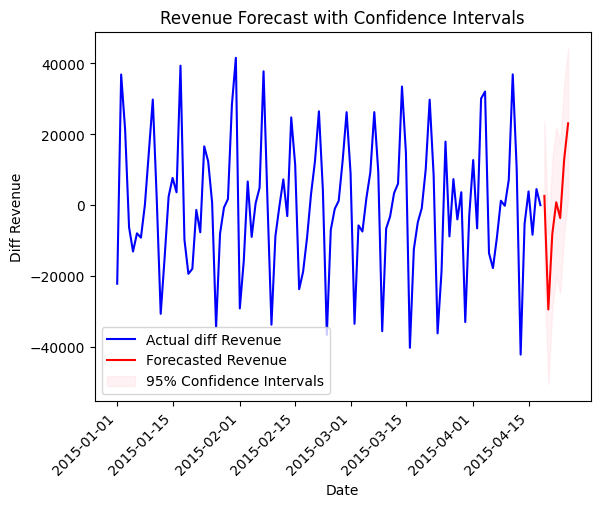

In [40]:
# Filter data for plotting after the year 2015
plot_start_date = '2015-01-01'
filtered_actual_data = daily_revenue[daily_revenue.index >= plot_start_date]
filtered_forecast_values_diff = forecast_values_diff[forecast_values_diff.index >= plot_start_date]
filtered_confidence_intervals_diff = confidence_intervals_diff[confidence_intervals_diff.index >= plot_start_date]

# Plot the actual data
plt.plot(filtered_actual_data.index, filtered_actual_data['diff_revenue'], label='Actual diff Revenue', color='blue')

# Plot the forecasted values
plt.plot(filtered_forecast_values_diff.index, filtered_forecast_values_diff, label='Forecasted Revenue', color='red')

# Plot the confidence intervals
plt.fill_between(filtered_confidence_intervals_diff.index, 
                 filtered_confidence_intervals_diff.iloc[:, 0], 
                 filtered_confidence_intervals_diff.iloc[:, 1], 
                 color='pink', alpha=0.2, label='95% Confidence Intervals')

# Rotate the date labels
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Diff Revenue')
plt.title('Revenue Forecast with Confidence Intervals')
plt.legend()
plt.show()


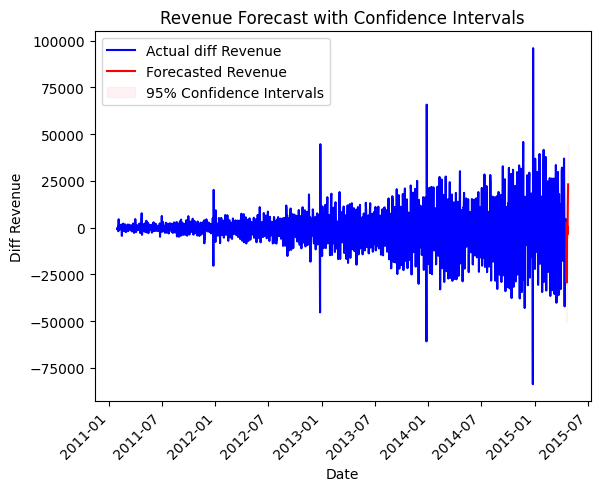

In [42]:
# Plot the actual data
plt.plot(daily_revenue.index, daily_revenue['diff_revenue'], label='Actual diff Revenue', color='blue')

# Plot the forecasted values
plt.plot(forecast_index, forecast_values_diff, label='Forecasted Revenue', color='red')

# Plot the confidence intervals
plt.fill_between(forecast_index, confidence_intervals_diff.iloc[:, 0], confidence_intervals_diff.iloc[:, 1], color='pink', alpha=0.2, label='95% Confidence Intervals')

# Rotate the date labels
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Diff Revenue')
plt.title('Revenue Forecast with Confidence Intervals')
plt.legend()
plt.show()

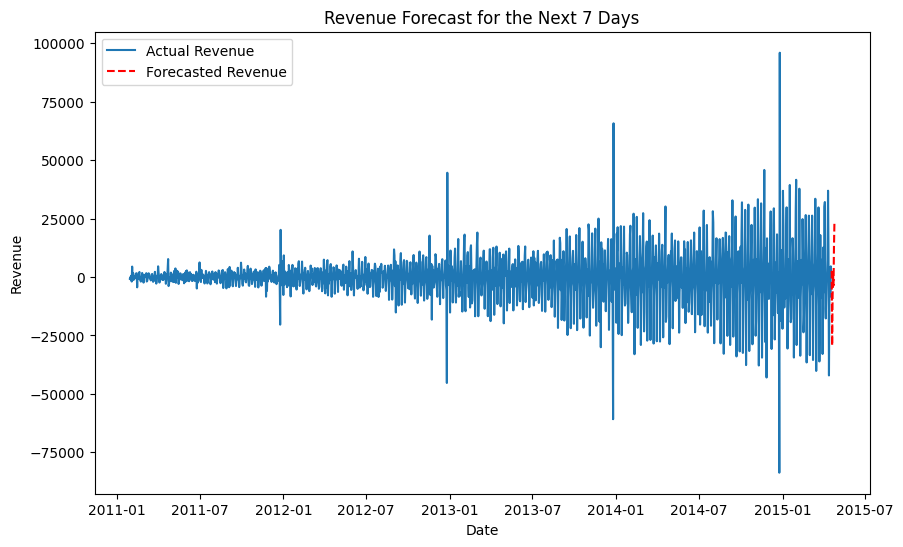

In [52]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined.index, combined['diff_revenue'], label='Actual Revenue')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Revenue', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Forecast for the Next 7 Days')
plt.legend()
plt.show()


## Revenue

In [8]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the parameter grids
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)
s_values = [7]  # Assuming a weekly seasonality

# Create a list of all possible parameter combinations
param_grid = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

# Perform grid search
best_rmse_score = float('inf')
best_mae_score = float('inf')
best_params = None

for params in param_grid:
    try:
        model = SARIMAX(train['revenue'], order=params[:3], seasonal_order=params[3:])
        result = model.fit(disp=False)
        forecast = result.get_forecast(steps=len(test))
        
        mse = mean_squared_error(test['revenue'], forecast.predicted_mean)
        rmse = np.sqrt(mse)  # Calculate RMSE
        
        mae = mean_absolute_error(test['revenue'], forecast.predicted_mean)  # Calculate MAE
        
        if rmse < best_rmse_score:
            best_rmse_score = rmse
            best_params = params
        
        if mae < best_mae_score:
            best_mae_score = mae
    except:
        continue

print('Best Parameters:', best_params)
print('Best RMSE:', best_rmse_score)
print('Best MAE:', best_mae_score)


/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stati

Best Parameters: (1, 1, 0, 1, 1, 2, 7)
Best RMSE: 9293.575140682535
Best MAE: 7524.662867072585


In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
order = (1, 1, 0,)  # (p, d, q)
seasonal_order = (1, 1, 2, 7)  # (P, D, Q, s)
model = SARIMAX(daily_revenue['revenue'], order=order, seasonal_order=seasonal_order)
result_revenue = model.fit(disp=False)

# Forecast the next 7 days
forecast_steps = 7
forecast = result_revenue.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=daily_revenue.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='D')

# Combine actual data and forecast
combined = pd.concat([daily_revenue, forecast.predicted_mean.to_frame(name='forecast')], axis=1)


/Users/cent/.pyenv/versions/3.9.13/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Print the forecasted values
print("Forecasted Revenue for the Next 7 Days:")
print(forecast_values)

# Optionally, you can also print confidence intervals
print("\nConfidence Intervals:")
print(confidence_intervals)

Forecasted Revenue for the Next 7 Days:
2015-04-19    131267.503610
2015-04-20    102118.109911
2015-04-21     93650.299963
2015-04-22     94587.552409
2015-04-23     90682.948203
2015-04-24    103768.540192
2015-04-25    128980.618421
Freq: D, Name: predicted_mean, dtype: float64

Confidence Intervals:
            lower revenue  upper revenue
2015-04-19  114472.950795  148062.056425
2015-04-20   82694.856146  121541.363675
2015-04-21   70440.244691  116860.355234
2015-04-22   68697.806705  120477.298113
2015-04-23   62152.328125  119213.568281
2015-04-24   72904.979473  134632.100912
2015-04-25   95915.973743  162045.263099


In [51]:
# Extract the actual values from the test set
actual_values = daily_revenue.tail(7)['revenue']

# Extract the forecasted values
forecast_values = forecast.predicted_mean

# Print or display the actual and forecasted values
print("Actual Values:")
print(actual_values)

print("\nForecasted Values:")
print(forecast_values)

Actual Values:
date
2015-04-12    148823.79
2015-04-13    106635.53
2015-04-14    101448.01
2015-04-15    105341.58
2015-04-16     97011.26
2015-04-17    101558.47
2015-04-18    129807.89
Freq: D, Name: revenue, dtype: float64

Forecasted Values:
2015-04-19    131267.503610
2015-04-20    102118.109911
2015-04-21     93650.299963
2015-04-22     94587.552409
2015-04-23     90682.948203
2015-04-24    103768.540192
2015-04-25    128980.618421
Freq: D, Name: predicted_mean, dtype: float64


In [52]:
# Calculate evaluation metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 8869.69145910223
Mean Absolute Error: 7141.585382266916


In [53]:
# Get AIC
aic_value = result_revenue.aic
print('AIC:', aic_value)

AIC: 31907.205916259943


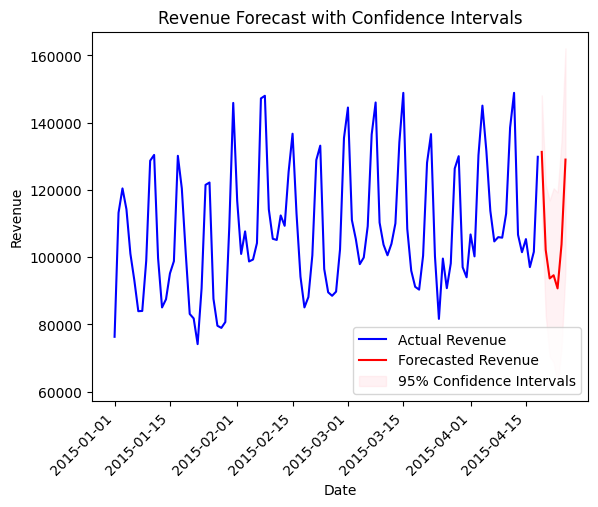

In [54]:
# Filter data for plotting after the year 2015
plot_start_date = '2015-01-01'
filtered_actual_data = daily_revenue[daily_revenue.index >= plot_start_date]
filtered_forecast_values = forecast_values[forecast_values.index >= plot_start_date]
filtered_confidence_intervals = confidence_intervals[confidence_intervals.index >= plot_start_date]

# Plot the actual data
plt.plot(filtered_actual_data.index, filtered_actual_data['revenue'], label='Actual Revenue', color='blue')

# Plot the forecasted values
plt.plot(forecast_values.index, forecast_values, label='Forecasted Revenue', color='red')

# Plot the confidence intervals
plt.fill_between(confidence_intervals.index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.2, label='95% Confidence Intervals')

# Rotate the date labels
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Forecast with Confidence Intervals')
plt.legend()
plt.show()

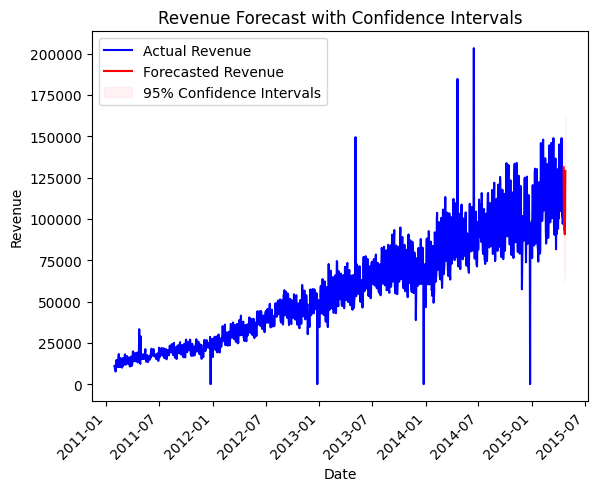

In [55]:
# Plot the actual data
plt.plot(daily_revenue.index, daily_revenue['revenue'], label='Actual Revenue', color='blue')

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, label='Forecasted Revenue', color='red')

# Plot the confidence intervals
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.2, label='95% Confidence Intervals')

# Rotate the date labels
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Forecast with Confidence Intervals')
plt.legend()
plt.show()


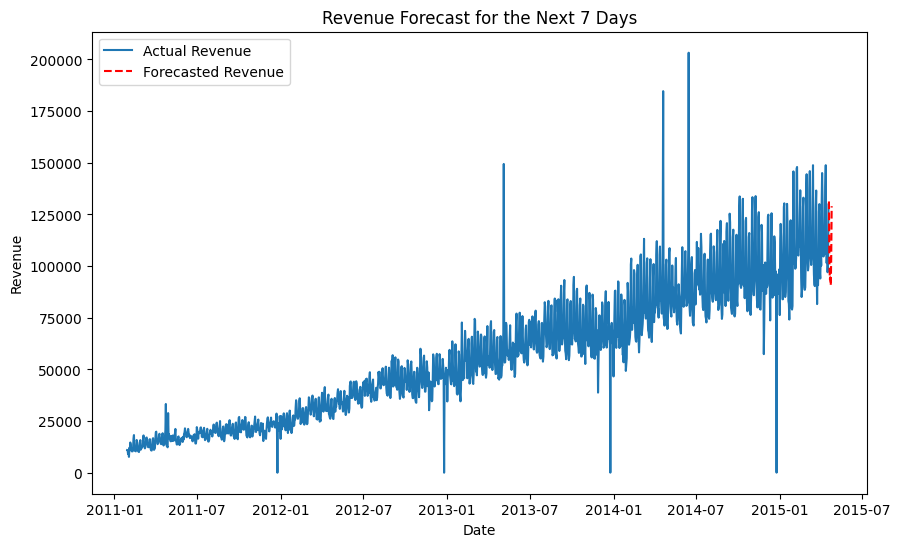

In [71]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined.index, combined['revenue'], label='Actual Revenue')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Revenue', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Forecast for the Next 7 Days')
plt.legend()
plt.show()


In [73]:
import pickle

# Save the trained model to a file
sarima_path = '/Users/cent/Documents/MDSI_Spring2023/avml_at2/adv_mla_at2/models/forecasting/sarima_model.pkl'
with open(sarima_path, 'wb') as model_file:
    pickle.dump(result, model_file)


In [ ]:

# Load the saved model from the file
with open(sarima_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now, you can use the loaded model to make forecasts as before
loaded_forecast = loaded_model.get_forecast(steps=forecast_steps)